# 3 - Million Russian Troll Tweets - Part I
- James M Irving, Ph.D.
- Mod 4 Project
- Flatiron Full Time Data Science Bootcamp - 02/2019 Cohort

## GOAL: Using Twitter API to Extract Control Tweets

- *IF I can get a control dataset* of non-Troll tweets from same time period with similar hashtags:*
    - Use NLP to predict of a tweet is from an authentic user or a Russian troll.
- *If no control tweets to compare to*
    - Use NLP to predict how many retweets a Troll tweet will get.
    - Consider both raw # of retweets, as well as a normalized # of retweets/# of followers.
        - The latter would give better indication of language's effect on propagation. 
        

# INSPECTING TROLL TWEETS ~~FROM KAGGLE~~ From FiveThirtyEight


- GitHub Repository with FiveThirtyEight's version of russian troll tweets: https://github.com/fivethirtyeight/russian-troll-tweets/

In [1]:
# import bs_ds as bs
# from bs_ds.imports import *

!pip install -U dojo_ds #-q
import dojo_ds as ds
from dojo_ds.imports import *

dojo_ds v1.1.8 loaded.


Package,Handle,Version,Documentation,Imported
dojo_ds,ds,1.1.8,https://fs-ds.readthedocs.io/en/latest/,Y
matplotlib,mpl,3.8.4,https://matplotlib.org/stable/api/index.html,Y
matplotlib.pyplot,plt,,https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot,Y
numpy,np,1.26.4,https://numpy.org/doc/stable/reference/,Y
pandas,pd,2.2.2,https://pandas.pydata.org/docs/,Y
seaborn,sns,0.13.2,https://seaborn.pydata.org/api.html,Y
sklearn,,1.4.1.post1,,N


In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
import os, glob
root_dir = 'russian-troll-tweets/'
# os.listdir('russian-troll-tweets/')

filelist = sorted(glob.glob(root_dir+'*.csv'))
# filelist = [os.path.join(root_dir,file) for file in os.listdir(root_dir) if file.endswith('.csv')]
filelist

['russian-troll-tweets/IRAhandle_tweets_1.csv',
 'russian-troll-tweets/IRAhandle_tweets_10.csv',
 'russian-troll-tweets/IRAhandle_tweets_11.csv',
 'russian-troll-tweets/IRAhandle_tweets_12.csv',
 'russian-troll-tweets/IRAhandle_tweets_13.csv',
 'russian-troll-tweets/IRAhandle_tweets_2.csv',
 'russian-troll-tweets/IRAhandle_tweets_3.csv',
 'russian-troll-tweets/IRAhandle_tweets_4.csv',
 'russian-troll-tweets/IRAhandle_tweets_5.csv',
 'russian-troll-tweets/IRAhandle_tweets_6.csv',
 'russian-troll-tweets/IRAhandle_tweets_7.csv',
 'russian-troll-tweets/IRAhandle_tweets_8.csv',
 'russian-troll-tweets/IRAhandle_tweets_9.csv']

In [4]:
# Vertically concatenate 
df_list = []
for file in filelist:
    df_new = pd.read_csv(file, low_memory=False)
    df_list.append(df_new)

df = pd.concat(df_list, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2946207 entries, 0 to 233539
Data columns (total 21 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   external_author_id  object
 1   author              object
 2   content             object
 3   region              object
 4   language            object
 5   publish_date        object
 6   harvested_date      object
 7   following           int64 
 8   followers           int64 
 9   updates             int64 
 10  post_type           object
 11  account_type        object
 12  retweet             int64 
 13  account_category    object
 14  new_june_2018       int64 
 15  alt_external_id     object
 16  tweet_id            int64 
 17  article_url         object
 18  tco1_step1          object
 19  tco2_step1          object
 20  tco3_step1          object
dtypes: int64(6), object(15)
memory usage: 494.5+ MB


In [5]:
df.head(2)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN


## Dataset Features:
- Kaggle Dataset published by FiveThirtyEight
    - https://www.kaggle.com/fivethirtyeight/russian-troll-tweets/downloads/russian-troll-tweets.zip/2
<br>    
- Data is split into 9 .csv files
    - 'IRAhandle_tweets_1.csv' to 9

- **Variables:**
    - ~~`external_author_id` | An author account ID from Twitter~~
    - `author` | The handle sending the tweet
    - `content` | The text of the tweet
    - `region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?   id=000199367&type=1)
    - `language` | The language of the tweet
    - `publish_date` | The date and time the tweet was sent
    - ~~`harvested_date` | The date and time the tweet was collected by Social Studio~~
    - `following` | The number of accounts the handle was following at the time of the tweet
    - `followers` | The number of followers the handle had at the time of the tweet
    - `updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
    - `post_type` | Indicates if the tweet was a retweet or a quote-tweet *[Whats a quote-tweet?]*
    - `account_type` | Specific account theme, as coded by Linvill and Warren
    - `retweet` | A binary indicator of whether or not the tweet is a retweet [?]
    - `account_category` | General account theme, as coded by Linvill and Warren
    - `new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018
    
### **Classification of account_type**
Taken from: [rcmediafreedom.eu summary](https://www.rcmediafreedom.eu/Publications/Academic-sources/Troll-Factories-The-Internet-Research-Agency-and-State-Sponsored-Agenda-Building)

>- **They identified five categories of IRA-associated Twitter accounts, each with unique patterns of behaviors:**
    - **Right Troll**, spreading nativist and right-leaning populist messages. It supported the candidacy and Presidency of Donald Trump and denigrated the Democratic Party. It often sent divisive messages about mainstream and moderate Republicans.
    - **Left Troll**, sending socially liberal messages and discussing gender, sexual, religious, and -especially- racial identity. Many tweets seemed intentionally divisive, attacking mainstream Democratic politicians, particularly Hillary Clinton, while supporting Bernie Sanders prior to the election.
    - **News Feed**, overwhelmingly presenting themselves as U.S. local news aggregators, linking to legitimate regional news sources and tweeting about issues of local interest.
    - **Hashtag Gamer**, dedicated almost exclusively to playing hashtag games.
    - **Fearmonger**: spreading a hoax about poisoned turkeys near the 2015 Thanksgiving holiday.

>The different types of account were used differently and their efforts were conducted systematically, with different allocation when faced with different political circumstances or shifting goals. E.g.: there was a spike of activity by right and left troll accounts before the publication of John Podesta's emails by WikiLeaks. According to the authors, this activity can be characterised as “industrialized political warfare”.

___

# SCRUB / EDA

In [6]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

## Observations from Inspection / Pandas_Profiling ProfileReport

- **Language to Analyze is in `Content`:**
    - Actual tweet contents. 
 
- **Classification/Analysis Thoughts:**
    - **Variables should be considered in 2 ways:**
        - First, the tweet contents. 
            - Use NLP to engineer features to feed into deep learning.
                - Sentiment analysis, named-entity frequency/types, most-similar words. 
        - Second, the tweet metadata. 
        
### Thoughts on specific features:
- `language`
    - There are 56 unique languages. 
    - 2.4 million are English, 670 K are in Russian, etc.

### Questions to answer:
- [x] Why are so many post_types missing? (55%?)
    - Because they were added 'new_june_2018' and were not classified by the original scientists. 
- [x] How many tweets were written by a russian troll account?
    - After removing retweets, there are 1,272,848 original tweets. 
    
### Scrubing to Perform
- **Recast Columns:**
    - [ ] `publish_date` to datetime. 
- **Columns to Discard:**
    - [ ] `harvested_date` (we care about publish_date, if anything, time-wise)
    - [ ] `language`: remove all non-english tweets and drop column
    - [ ] `new_june_2018`

### Reducing Targeted Tweets to Language=English and Retweet=0 Only

- Since the goal is to use NLP to detect which tweets came from Russian trolls, we will only analyze the tweets that were originally created by a known Russian troll account

In [7]:
# Identify duplicate tweets
is_duplicate = df.duplicated(subset=['content'])
is_duplicate.sum() / len(is_duplicate)

0.19708526929709963

In [8]:
# Filter for english tweets
is_english = df['language'] == "English"
is_english.sum() / len(is_english)

0.7185058619438485

In [9]:
# Checking distribution of retweet column
is_retweet = df['retweet'] == 1
# df['retweet'].value_counts(normalize=True, dropna=False)
is_retweet.sum() / len(is_retweet)

0.44042458659557865

In [10]:
## Combine filters to remove unwanted rows 
is_english_original = is_english & ~is_retweet
is_english_original.sum() / len(is_english_original)

0.4291385500068393

In [11]:
# Save filtered df
df = df[is_english_original]
df

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
5,906000000000000000,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,10/1/2017 2:47,10/1/2017 2:47,1050,9644,247,NaN,Right,0,RightTroll,0,905874659358453760,914320835325853696,http://twitter.com/905874659358453760/statuses...,https://twitter.com/FoxNews/status/91423949678...,NaN,NaN
7,906000000000000000,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,10/1/2017 2:52,10/1/2017 2:53,1050,9644,249,NaN,Right,0,RightTroll,0,905874659358453760,914322215537119234,http://twitter.com/905874659358453760/statuses...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230905,2260338140,POLITICS_T0DAY,"Watch ""Missile launch over San Francisco"" by @...",United States,English,11/9/2015 14:42,11/9/2015 14:42,92,898,9502,NaN,Russian,0,NonEnglish,0,2260338140,663728439766204416,http://twitter.com/politics_t0day/statuses/663...,https://vimeo.com/145029572?ref=tw-share,NaN,NaN
230973,2260338140,POLITICS_T0DAY,Boeing Pieces Together the Last C-17 on the Li...,United States,English,12/1/2015 13:42,12/1/2015 13:42,92,919,10148,NaN,Russian,0,NonEnglish,0,2260338140,671685764418281472,http://twitter.com/politics_t0day/statuses/671...,https://youtu.be/90daE-lAQo0,NaN,NaN
232028,2260338140,POLITICS_T0DAY,Satanic Temple Performs the Nation's First Sta...,United States,English,12/23/2015 9:57,12/23/2015 9:57,92,900,10961,NaN,Russian,0,NonEnglish,0,2260338140,679601725314076672,http://twitter.com/politics_t0day/statuses/679...,https://youtu.be/nBufzUH-RpQ,NaN,NaN
232955,2260338140,POLITICS_T0DAY,Eagles of Death Metal Join U2 on Paris Stage h...,United States,English,12/8/2015 7:50,12/8/2015 7:51,92,935,10370,NaN,Russian,0,NonEnglish,0,2260338140,674134049749889024,http://twitter.com/politics_t0day/statuses/674...,https://youtu.be/JpgpkXdoCGc,NaN,NaN


In [12]:
# # Drop non-english rows
# df = df.loc[df['language'] =='English']
# df = df.loc[df.retweet==0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264331 entries, 0 to 233514
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   external_author_id  1264331 non-null  object
 1   author              1264331 non-null  object
 2   content             1264330 non-null  object
 3   region              1263195 non-null  object
 4   language            1264331 non-null  object
 5   publish_date        1264331 non-null  object
 6   harvested_date      1264331 non-null  object
 7   following           1264331 non-null  int64 
 8   followers           1264331 non-null  int64 
 9   updates             1264331 non-null  int64 
 10  post_type           0 non-null        object
 11  account_type        1264331 non-null  object
 12  retweet             1264331 non-null  int64 
 13  account_category    1264331 non-null  object
 14  new_june_2018       1264331 non-null  int64 
 15  alt_external_id     1264331 non-null  

In [13]:
# Drop harvested_date and new_june_2018
cols_to_drop = ['harvested_date','new_june_2018','tco1_step1','tco2_step1','tco3_step1',
                'account_type','post_type']

# for col in cols_to_drop:
#     df.drop(col, axis=1, inplace=True)
df = df.drop(columns=cols_to_drop, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264331 entries, 0 to 233514
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   external_author_id  1264331 non-null  object
 1   author              1264331 non-null  object
 2   content             1264330 non-null  object
 3   region              1263195 non-null  object
 4   language            1264331 non-null  object
 5   publish_date        1264331 non-null  object
 6   following           1264331 non-null  int64 
 7   followers           1264331 non-null  int64 
 8   updates             1264331 non-null  int64 
 9   retweet             1264331 non-null  int64 
 10  account_category    1264331 non-null  object
 11  alt_external_id     1264331 non-null  object
 12  tweet_id            1264331 non-null  int64 
 13  article_url         1264331 non-null  object
dtypes: int64(5), object(9)
memory usage: 144.7+ MB


___
## Save/Load and Resume

In [14]:
import os
folder = "data/"
os.makedirs(folder, exist_ok=True)

fpath_out = os.path.join(folder, "russian-troll-tweets_enlgish-only_no-retweets.csv.gz")
fpath_out

'data/russian-troll-tweets_enlgish-only_no-retweets.csv.gz'

In [15]:
df.index

Index([     0,      1,      3,      5,      7,      8,      9,     10,     11,
           12,
       ...
       229186, 229470, 229869, 229891, 230601, 230905, 230973, 232028, 232955,
       233514],
      dtype='int64', length=1264331)

In [16]:
# Save smaller filtered dataset 
compression_kws = {'method':'gzip',
                  'compresslevel':9}
df.to_csv(fpath_out, compression=compression_kws, index=False)

In [17]:
# Loading in saved dataframe
df = pd.read_csv(fpath_out)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264331 entries, 0 to 1264330
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   external_author_id  1264331 non-null  int64 
 1   author              1264331 non-null  object
 2   content             1264330 non-null  object
 3   region              1263195 non-null  object
 4   language            1264331 non-null  object
 5   publish_date        1264331 non-null  object
 6   following           1264331 non-null  int64 
 7   followers           1264331 non-null  int64 
 8   updates             1264331 non-null  int64 
 9   retweet             1264331 non-null  int64 
 10  account_category    1264331 non-null  object
 11  alt_external_id     1264331 non-null  int64 
 12  tweet_id            1264331 non-null  int64 
 13  article_url         1264331 non-null  object
dtypes: int64(7), object(7)
memory usage: 135.0+ MB


,external_author_id,author,content,region,language,publish_date,following,followers,updates,retweet,account_category,alt_external_id,tweet_id,article_url
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,0,RightTroll,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,0,RightTroll,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...


In [18]:
# Checking labeled account category
df['account_category'].value_counts()

account_category
NewsFeed        595561
RightTroll      399850
Commercial      105928
LeftTroll        76365
HashtagGamer     67387
Fearmonger        9549
NonEnglish        5768
Unknown           3923
Name: count, dtype: int64

In [19]:
# df['account_type'].value_counts()

In [20]:
# save_or_load = input('Would you like to "save" or "load" dataframe?\n("save","load","no"):')

# if save_or_load.lower()=='save':
#     # Save csv
#     df.to_csv('russian_troll_tweets_eng_only_date_pub_index.csv')
    
# if save_or_load.lower()=='load':
#     import bs_ds as bs
#     from bs_ds.imports import *
#     # Load csva
#     df = pd.read_csv('russian_troll_tweets_eng_only_date_pub_index.csv')    

In [21]:
# for i in range(10):
#     print(i,'\t',np.random.choice(df['content']))

# Using TwitterAPI to Harvest Control Tweets

## My Search Strategy

- **We need non-troll Tweets to use as a control for the Troll tweets. Ideally, these would be from the same time period covered by the Troll tweets.**

    - However, extracting batch historical tweets from the same time period is not an option. This would **require Twitter Enterprise level** Developer Membership (which costs **\\$2,000 per month**)
    - The free Twitter developer account access allows extracting Tweets from the last 7 days. We will have to work within this limitation for harvesting control tweets.
    - Due to the temporal difference, extra care must be put into Tweet search strategy.



**Inspect Data to get search parameters:**
- [X] Get the date range for the English tweets in the original dataset<br>
    - **Tweet date range:**
        - **2012-02-06** to **2018-05-30**

- [X] Get a list of the hash tags (and their frequencies from the dataframe


### Recasting Publish date as datetime column (date_published)

In [22]:
# Recast date_published as datetime and make index
df['date_published'] = pd.to_datetime(df['publish_date'])
# df = df.set_index('date_published')
print('Changed index to datetime "date_published".')
df['date_published']

Changed index to datetime "date_published".


0         2017-10-01 19:58:00
1         2017-10-01 22:43:00
2         2017-10-01 23:52:00
3         2017-10-01 02:47:00
4         2017-10-01 02:52:00
                  ...        
1264326   2015-11-09 14:42:00
1264327   2015-12-01 13:42:00
1264328   2015-12-23 09:57:00
1264329   2015-12-08 07:50:00
1264330   2016-02-16 11:58:00
Name: date_published, Length: 1264331, dtype: datetime64[ns]

In [23]:
# Convert publish_date to datetime
# df['date_published'] = pd.to_datetime(df.publish_date)
date_col = df['date_published']
print(f'Tweet dates from {np.min(date_col)}  to  {np.max(date_col)}')

Tweet dates from 2012-02-06 20:24:00  to  2018-05-30 20:58:00


In [24]:
# Inspect Data to get search parameters:
time_fmt = "%m/%d/%Y"
first_tweet = date_col.min()
last_tweet = date_col.max()
print(f'Tweet date range:\n - {first_tweet.strftime(time_fmt)} to {last_tweet.strftime(time_fmt)}')
print(f'Total days:\n - {(last_tweet-first_tweet).days}')

Tweet date range:
 - 02/06/2012 to 05/30/2018
Total days:
 - 2305


## Determining Hashtags & @'s to search for

- Use regular expressions to extract the hashtags #words and @handles.
- Use the top X many tags as search terms for twitter API
    - There are _1,678,170 unique hashtags_ and _1,165,744 unique @'s_

In [25]:
# NEW: Make a column containing all hashtags and mentions
import re

hashtag_expr = r'(\#\w*)'
hashtags = re.compile(hashtag_expr)
df['hashtags'] = df['content'].str.findall(hashtag_expr) #map(lambda x: hashtags.findall(str(x)))

mentions_expr = r'(\@\w*)'
mentions = re.compile(mentions_expr)
df['mentions'] = df['content'].str.findall(mentions_expr) #map(lambda x: mentions.findall(str(x)))

urls_expr = r"(http[s]?://\w*\.\w*/+\w+)"
urls = re.compile(urls_expr)
df['links'] = df['content'].str.findall(urls_expr)#map(lambda x: urls.findall(str(x)))

# # Testing individual re's from above
# hashtag_list = df['content'].map(lambda x: hashtags.findall(str(x)))
# hashtag_list[-10:]

In [26]:
# Get hashtag counts
exploded_tags = df['hashtags'].explode()
hashtag_counts = exploded_tags.value_counts(dropna=False)
hashtag_counts

hashtags
NaN                675967
#news              118435
#sports             45476
#politics           37405
#world              27058
                    ...  
#MoveMojito             1
#Move9                  1
#Event                  1
#ParyForAmerica         1
#heisenberg             1
Name: count, Length: 32513, dtype: int64

In [27]:
# Getting list of all unique hashtags
hashtag_list = exploded_tags.unique()
print(f"Found {len(hashtag_list)} unique hashtags.")
print(hashtag_list[:10])

Found 32513 unique hashtags.
[nan '#HipHopAwards' '#WomenBoycottTwitter' '#LasVegas'
 '#LasVegasShooting' '#VegasStrong' '#FakeNews' '#IrmaHurricane2017'
 '#Irma' '#HurricaneIrma']


In [28]:
df

,external_author_id,author,content,region,language,publish_date,following,followers,updates,retweet,account_category,alt_external_id,tweet_id,article_url,date_published,hashtags,mentions,links
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,0,RightTroll,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,2017-10-01 19:58:00,[],[@nedryun],[https://t.co/gh6g0D1oiC]
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,0,RightTroll,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,2017-10-01 22:43:00,[],[],[https://t.co/mLH1i30LZZ]
2,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,0,RightTroll,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,2017-10-01 23:52:00,[],[],[https://t.co/z9wVa4djAE]
3,906000000000000000,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,10/1/2017 2:47,1050,9644,247,0,RightTroll,905874659358453760,914320835325853696,http://twitter.com/905874659358453760/statuses...,2017-10-01 02:47:00,[],[],[https://t.co/AigV93aC8J]
4,906000000000000000,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,10/1/2017 2:52,1050,9644,249,0,RightTroll,905874659358453760,914322215537119234,http://twitter.com/905874659358453760/statuses...,2017-10-01 02:52:00,[],"[@SenatorMenendez, @CarmenYulinCruz]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264326,2260338140,POLITICS_T0DAY,"Watch ""Missile launch over San Francisco"" by @...",United States,English,11/9/2015 14:42,92,898,9502,0,NonEnglish,2260338140,663728439766204416,http://twitter.com/politics_t0day/statuses/663...,2015-11-09 14:42:00,[],"[@Varient3, @Vimeo]",[https://t.co/X50JkMr9UR]
1264327,2260338140,POLITICS_T0DAY,Boeing Pieces Together the Last C-17 on the Li...,United States,English,12/1/2015 13:42,92,919,10148,0,NonEnglish,2260338140,671685764418281472,http://twitter.com/politics_t0day/statuses/671...,2015-12-01 13:42:00,[],[@YouTube],[https://t.co/QSkB1EL4CB]
1264328,2260338140,POLITICS_T0DAY,Satanic Temple Performs the Nation's First Sta...,United States,English,12/23/2015 9:57,92,900,10961,0,NonEnglish,2260338140,679601725314076672,http://twitter.com/politics_t0day/statuses/679...,2015-12-23 09:57:00,[],[@YouTube],[https://t.co/VwaztidS4g]
1264329,2260338140,POLITICS_T0DAY,Eagles of Death Metal Join U2 on Paris Stage h...,United States,English,12/8/2015 7:50,92,935,10370,0,NonEnglish,2260338140,674134049749889024,http://twitter.com/politics_t0day/statuses/674...,2015-12-08 07:50:00,[],[@YouTube],[https://t.co/4pEID0ip8q]


In [29]:
col='hashtags'
cell_dtypes = type(df[col].iloc[0])
cell_dtypes

list

### Determine Top 30 Hashtags and Mentions in Troll Tweets

In [30]:
def get_most_common_from_list_col(df, col, dropna=True, normalize=False, top_n=None):
    import ast
    example_cell = df[col].iloc[0]
    
    if isinstance(example_cell, str):
        # try:
        list_col = df[col].fillna('[]').map(lambda x: ast.literal_eval(x))
        # except E
    else:
        list_col = df[col].fillna('')
    
    exploded_col = list_col.explode()
    value_counts = exploded_col.value_counts(dropna=dropna, normalize=normalize)

    if top_n is None:

        return value_counts
    else:
        return value_counts.head(top_n)



In [31]:
df.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'following', 'followers', 'updates', 'retweet',
       'account_category', 'alt_external_id', 'tweet_id', 'article_url',
       'date_published', 'hashtags', 'mentions', 'links'],
      dtype='object')

In [32]:
list_top_30_tags = get_most_common_from_list_col(df,'hashtags', dropna=True, normalize=False, top_n=30)
list_top_30_tags

hashtags
#news                118435
#sports               45476
#politics             37405
#world                27058
#local                23109
#TopNews              14608
#health               10317
#business              9537
#BlackLivesMatter      8241
#tech                  7834
#entertainment         7224
#MAGA                  6847
#top                   6581
#Cleveland             6519
#crime                 6298
#TopVideo              6151
#environment           5657
#PJNET                 4754
#mar                   4691
#FAKENEWS              4306
#Miami                 4198
#tcot                  4163
#IslamKills            3854
#topl                  3832
#SanJose               3813
#life                  3696
#breaking              3653
#ISIS                  3643
#DemnDebate            3585
#KochFarms             2880
Name: count, dtype: int64

In [33]:
list_top_30_ats = get_most_common_from_list_col(df,'mentions', top_n=30)
list_top_30_ats

mentions
@midnight           6691
@realDonaldTrump    3514
@WarfareWW          1527
@CNN                1469
@HillaryClinton     1419
@POTUS              1030
@CNNPolitics         948
@FoxNews             925
@mashable            740
@YouTube             680
@AC360               658
@CNNSitRoom          657
@VanJones68          651
@CNNI                650
@JakeTapper          649
@DonLemon            649
@TheLeadCNN          649
@AnaNavarro          648
@BrianStelter        648
@WolfBlitzer         647
@AndersonCooper      647
@truthfeednews       497
@Jenn_Abrams         466
@washingtonpost      443
@nytimes             441
@jstines3            413
@deray               380
@Acosta              367
@                    363
@todayinsyria        357
Name: count, dtype: int64

### def get_tags_ats `[DEPRECATED 2024]`

In [34]:
# from tqdm import tqdm
# all_hashtags = []
# for i in range(len(hashtag_list)):
#     if len(hashtag_list[i])==0:
#         continue
#     elif len(hashtag_list[i])>1:
#         [all_hashtags.append(x) for x in hashtag_list[i]]

#     else:
#         all_hashtags.append(hashtag_list[i])
    
# hashtag_counts = pd.Series(all_hashtags)
# hashtag_counts.value_counts()

In [35]:
# # Define get_tags_ats to accept a list of text entries and return all found tags and ats as 2 series/lists
# def get_tags_ats(text_to_search,exp_tag = r'(#\w*)',exp_at = r'(@\w*)', output='series',show_counts=False):
#     """Accepts a list of text entries to search, and a regex for tags, and a regex for @'s.
#     Joins all entries in the list of text and then re.findsall() for both expressions.
#     Returns a series of found_tags and a series of found_ats.'"""
#     import re
    
#     # Create a single long joined-list of strings
#     text_to_search_combined = ' '.join(text_to_search)
        
#     # print(len(text_to_search_combined), len(text_to_search_list))
#     found_tags = re.findall(exp_tag, text_to_search_combined)
#     found_ats = re.findall(exp_at, text_to_search_combined)
    
#     if output.lower() == 'series':
#         found_tags = pd.Series(found_tags, name='tags')
#         found_ats = pd.Series(found_ats, name='ats')
        
#         if show_counts==True:
#             print(f'\t{found_tags.name}:\n{tweet_tags.value_counts()} \n\n\t{found_ats.name}:\n{tweet_ats.value_counts()}')
                
#     if (output.lower() != 'series') & (show_counts==True):
#         raise Exception('output must be set to "series" in order to show_counts')
                       
#     return found_tags, found_ats

In [36]:
# # Need to get a list of hash tags.
# text_to_search_list = []

# for i in range(len(df)):    
#     tweet_contents =df['content'].iloc[i]
#     text_to_search_list.append(tweet_contents)

# text_to_search_list[:2]

In [37]:
# # Get all tweet tags and @'s from text_to_search_list
# tweet_tags, tweet_ats = get_tags_ats(text_to_search_list, show_counts=False)

# print(f"There were {len(tweet_tags)} unique hashtags and {len(tweet_ats)} unique @'s\n")

# # Create a dataframe with top_tags
# df_top_tags = pd.DataFrame(tweet_tags.value_counts()[:40])#,'\n')
# df_top_tags['% Total'] = (df_top_tags['tags']/len(tweet_tags)*100)

# # Create a dataframe with top_ats
# df_top_ats = pd.DataFrame(tweet_ats.value_counts()[:40])
# df_top_ats['% Total'] = (df_top_ats['ats']/len(tweet_ats)*100)

# # Display top tags and ats
# # bs.display_side_by_side(df_top_tags,df_top_ats)

### Notes on Top Tags and Ats:


In [38]:
# # Choose list of top tags to use in search
# list_top_30_tags = df_top_tags.index[:30]
# list_top_30_tags

In [39]:
# # Choose list of top tags to use in search
# list_top_30_ats = df_top_ats.index[:30]
# list_top_30_ats

## Summary of Tweet Search Strategy 
- **The most common hashtags include some very generic categories** that will not be appropriate control tweets.
    - Examples:
        - '#news','#sports','#politics','#world','#local','#TopNews','#health','#business','#tech'
    - If we used these to extract control Tweets, our model would be biased, since many of these categories contain time-specific topics and would therefore be easy to predict vs. the troll tweets.
  
- **The most common @'s are much more revealing and helpful in narrowing the focus of the results.**
    - Final decision is to use the top 40 mentions from the trolls tweets and extracting present-day Tweets with the same mentions. 
___

# Using the Twitter Search API to Extract Control Tweets

- [x] Required API key are saved in the Main folder in which this repo is saved. 
- [x] Check the [Premium account docs for search syntax](https://developer.twitter.com/en/docs/tweets/search/guides/premium-operators.html)
- [x] [Check this article for using Tweepy for most efficient twitter api extraction](https://bhaskarvk.github.io/2015/01/how-to-use-twitters-search-rest-api-most-effectively./)

**LINK TO PREMIUM SEARCH API GUIDE**<br>
https://developer.twitter.com/en/docs/tweets/search/api-reference/premium-search

**Available search operators**
- Premium search API supports rules with up to 1,024 characters. The Search Tweets APIs support the premium operators listed below. See our Premium operators guide for more details.

- The base URI for the premium search API is https://api.twitter.com/1.1/tweets/search/.

**Matching on Tweet contents:**
- keyword , "quoted phrase" , # , @, url , lang


## ⛔️ Using `tweepy` to access twitter API

In [40]:
# No longer needed - converted unusable code to python-flavor markdown
# raise Exception("Free twitter API access has been removed and the following code is no longer runnable.")


### def connect_twitter_api, def search_twitter_api

```python
# Initialzie Tweepy with Authorization Keys    
def connect_twitter_api(api_key, api_secret_key):
    import tweepy, sys
    auth = tweepy.AppAuthHandler(api_key, api_secret_key)
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    if (not api):
        print("Can't authenticate.")
        sys.exit(-1)
    return api

def search_twitter_api(api_object, searchQuery, maxTweets, fName, tweetsPerQry=100, max_id=0, sinceId=None):
    """Take an authenticated tweepy api_object, a search queary, max# of tweets to retreive, a desintation filename.
    Uses tweept.api.search for the searchQuery until maxTweets is reached, saved harvest tweets to fName."""
    import sys, jsonpickle, os
    api = api_object
    tweetCount = 0
    print(f'Downloading max{maxTweets} for {searchQuery}...')
    with open(fName, 'a+') as f:
        while tweetCount < maxTweets:

            try:
                if (max_id <=0):
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry, tweet_mode='extended')
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry, since_id=sinceId, tweet_mode='extended')

                else:
                    if (not sinceId):
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry, max_id=str(max_id-1), tweet_mode='extended')
                    else:
                        new_tweets = api.search(q=searchQuery, count=tweetsPerQry, max_id=str(max_id-1),since_id=sinceId, tweet_mode='extended')

                if not new_tweets:
                    print('No more tweets found')
                    break

                for tweet in new_tweets:
                    f.write(jsonpickle.encode(tweet._json, unpicklable=False)+'\n')

                tweetCount+=len(new_tweets)

                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                # Just exit if any error
                print("some error : " + str(e))
                break
    print ("Downloaded {0} tweets, Saved to {1}\n".format(tweetCount, fName))
```

## Connect to Twitter and Harvest Tweets

### Making lists of tags and ats to query

```python
# Figure out the # of each @ and each # that i want ot query, then make a query_dict to feed into the cell below
query_ats = tuple(zip(df_top_ats.index, df_top_ats['ats']))
query_tags = tuple(zip(df_top_tags.index, df_top_tags['tags']))

# Calculate how many tweets are represented by the top 30 tags and top 30 @'s 
sum_top_tweet_tags = df_top_tags['tags'].sum()
sum_top_tweet_ats = df_top_ats['ats'].sum()
print(f"Sum of top tags = {sum_top_tweet_tags}\nSum of top @'s = {sum_top_tweet_ats}")

print(query_ats[:10],'\n')
print(query_tags[:10])

np.sum([x[1] for x in query_ats])
```

```python
# Inspect Data to get search parameters:
print(f'Tweet date range:\n {min(df.index)} to {max(df.index)}')
print(f'\nTotal days: {max(df.index)-min(df.index)}')
```

### Connecting to twitter api and searching for lists of queries

```python
# Import API keys from text files (so not displayed here and not in repo)
with open('../consumer_API_key.txt','r') as f:
    api_key =  f.read()
with open('../consumer_API_secret_key.txt','r') as f:
    api_secret_key  = f.read()
```

#### Test searches

```python

# Manually connecting to API and doing test searches. 
import tweepy, sys
auth = tweepy.AppAuthHandler(api_key, api_secret_key)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

if (not api):
    print("Can't authenticate.")
    sys.exit(-1)
```

```python
# Search for a batch of test results
searchQuery='#politics'
tweetsPerQry=100

new_tweets = api.search(q=searchQuery, count=tweetsPerQry, tweet_mode='extended')
type(new_tweets)
```


```python
#  Display time range of new_tweets so i can define a timetrange to test
test_dates = [x.created_at for x in new_tweets]
print(f'Range:{min(test_dates)} to {max(test_dates)}')
test_dates[0], test_dates[-1]
```


```python
from datetime import datetime
end_time = datetime(2019,6,2,20,0,0)
end_time
```

```python
## DEFINING A NEW FUNCTION TO EXAMINE THE NEW_TWEETS OUTPUTS
def check_tweet_daterange(new_tweets,timerange_begin,timerange_end,verbose=0):
    """Examines specific information for each tweet in a tweepy searchResults object."""
    
    time_start = timerange_begin
    time_end = timerange_end
    
    # Pull out each tweet's status object. 
    idx_keep_tweets = []
    for i,tweet in enumerate(new_tweets):
        if (tweet.created_at > time_start) and (tweet.created_at < time_end):
            idx_keep_tweets.append(i)
            if verbose>0:
                print(f'tweet({i} kept:{tweet.created_at})')
    return idx_keep_tweets
```

```python

# Determining search criteria to limit twitter results to
latest_date = max(df.index) # Get latest date from troll tweets
earliest_date = min(df.index) # Get the earliest date from troll tweets

# Convert pandas timestamps to datetime object for tweet results
latest_datetime = latest_date.to_pydatetime()
earliest_datetime = earliest_date.to_pydatetime()
```

#### Automated Searches:

```python
api = connect_twitter_api(api_key,api_secret_key)

# Extract tweets for top @'s, while matching the distribution of top @'s
final_query_list = query_ats
filename = 'tweets_for_top40_ats.txt'

for q in final_query_list:
    searchQuery = q[0]
    maxTweets = q[1]
    print(f'Query={searchQuery}, max={maxTweets}')
    search_twitter_api(api, searchQuery, maxTweets, fName=filename)
```

## 👉✅ Processing Extracted Tweets from API to match Troll Tweet Features [05/21/24] 

In [41]:
import os
os.listdir("final_dataset/")

['tweets_for_top40_ats.txt',
 '__df_full_tweets_all_text_processed__.csv',
 'russian_troll_tweets_eng_only_date_pub_index.csv']

In [42]:
import json
top_mentions_filename = "final_dataset/tweets_for_top40_ats.txt"  

In [43]:
df_ats = pd.read_json(top_mentions_filename, lines=True)
df_ats.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata,place,retweet_count,retweeted,source,truncated,user,retweeted_status,possibly_sensitive,extended_entities,quoted_status,quoted_status_id,quoted_status_id_str,withheld_in_countries
0,NaN,None,2019-06-02 18:34:59+00:00,"[0, 202]","{'hashtags': [{'indices': [48, 66], 'text': 'd...",0,False,@realDonaldTrump it’s perfectly reasonable tha...,None,1135253495479537664,1135253495479537664,realDonaldTrump,NaN,NaN,25073877.0,25073877.0,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,2019-06-02 18:34:59+00:00,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @BelkissObadia: BREAKING NEWS: \n\n@realDon...,None,1135253495303626753,1135253495303626752,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,950,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,None,2019-06-02 18:34:59+00:00,"[17, 207]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,@realDonaldTrump I thought you were supposed t...,None,1135253494963888135,1135253494963888128,realDonaldTrump,1.135250e+18,1.135250e+18,25073877.0,25073877.0,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,None,2019-06-02 18:34:59+00:00,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @realDonaldTrump: Mexico is sending a big d...,None,1135253494523281409,1135253494523281408,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,3128,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,None,2019-06-02 18:34:59+00:00,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @realDonaldTrump: Mexico is sending a big d...,None,1135253494254858240,1135253494254858240,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,3128,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,NaN,NaN,NaN,NaN


#### Tweets from Ats are Too Big for Repo

In [44]:
# Save as json.gz for repo
fname = 'data/tweets_for_top40_ats.json.gz'
df_ats.to_json(fname,compression=compression_kws )

### Additional Files (Not yet re-created in updated notebook)

In [45]:
os.listdir('final_dataset/')

['tweets_for_top40_ats.txt',
 '__df_full_tweets_all_text_processed__.csv',
 'russian_troll_tweets_eng_only_date_pub_index.csv']

In [46]:
# fname_temp_in = 'final_dataset/__df_full_tweets_all_text_processed__.csv'
# temp_df = pd.read_csv(fname_temp_in, low_memory=False)
# temp_df

In [47]:
# memory = temp_df.memory_usage()
# (memory/memory.sum()).round(2)

In [48]:

# # Save as json.gz for repo
# fname_temp_out = fname_temp_in.replace('final_dataset/',folder).replace('.csv','.csv.gz')
# print(fname_temp_out)
# # temp_df.to_json(fname_temp,compression=compression_kws )
# temp_df.to_csv(fname_temp_out, compression=compression_kws)

## [ 📌Bookmark 05/21/24] EDA on Extracted Tweets

> 🚨🤔 05/21/2024: Why remove RT here? I know its retweets, but...?

<Axes: >

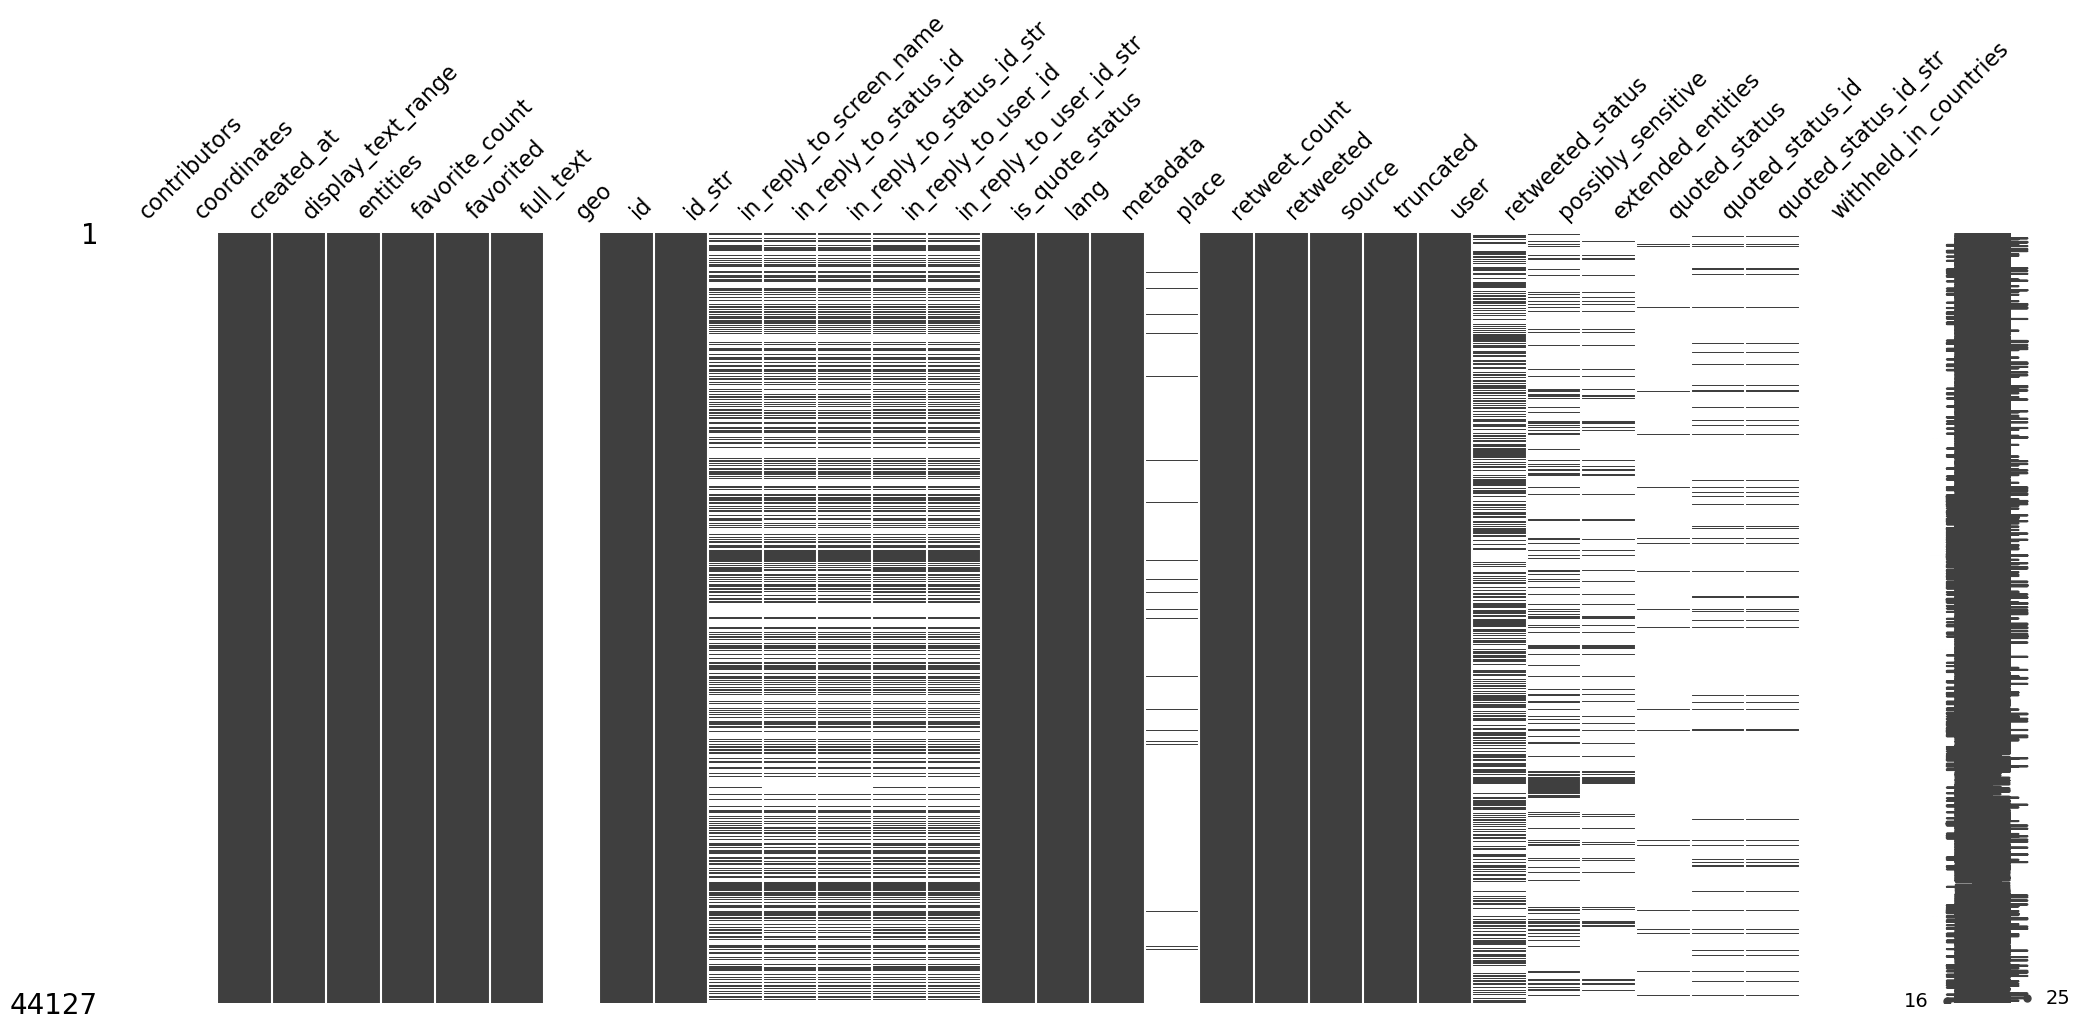

In [49]:
import missingno
missingno.matrix(df_ats)

In [50]:
# Get % null for each column to drop high nulls
perc_null = (df_ats.isna().sum()/len(df_ats) * 100).round(2)
perc_null

contributors                 100.00
coordinates                   99.99
created_at                     0.00
display_text_range             0.00
entities                       0.00
favorite_count                 0.00
favorited                      0.00
full_text                      0.00
geo                           99.99
id                             0.00
id_str                         0.00
in_reply_to_screen_name       53.27
in_reply_to_status_id         56.14
in_reply_to_status_id_str     56.14
in_reply_to_user_id           53.27
in_reply_to_user_id_str       53.27
is_quote_status                0.00
lang                           0.00
metadata                       0.00
place                         98.28
retweet_count                  0.00
retweeted                      0.00
source                         0.00
truncated                      0.00
user                           0.00
retweeted_status              52.35
possibly_sensitive            78.59
extended_entities           

In [51]:
# Drop cols with >90% null
high_nan_cols = perc_null[perc_null>90].index
high_nan_cols

Index(['contributors', 'coordinates', 'geo', 'place', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'withheld_in_countries'],
      dtype='object')

In [52]:
in_reply_cols = [c for c in df_ats.columns if c.startswith('in_reply')]
in_reply_cols

['in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str']

In [53]:
df_ats = df_ats.drop(columns=[*high_nan_cols, *in_reply_cols])
df_ats

,created_at,display_text_range,entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,metadata,retweet_count,retweeted,source,truncated,user,retweeted_status,possibly_sensitive,extended_entities
0,2019-06-02 18:34:59+00:00,"[0, 202]","{'hashtags': [{'indices': [48, 66], 'text': 'd...",0,False,@realDonaldTrump it’s perfectly reasonable tha...,1135253495479537664,1135253495479537664,False,en,"{'iso_language_code': 'en', 'result_type': 're...",0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN
1,2019-06-02 18:34:59+00:00,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @BelkissObadia: BREAKING NEWS: \n\n@realDon...,1135253495303626753,1135253495303626752,False,en,"{'iso_language_code': 'en', 'result_type': 're...",950,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN
2,2019-06-02 18:34:59+00:00,"[17, 207]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,@realDonaldTrump I thought you were supposed t...,1135253494963888135,1135253494963888128,False,en,"{'iso_language_code': 'en', 'result_type': 're...",0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN
3,2019-06-02 18:34:59+00:00,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @realDonaldTrump: Mexico is sending a big d...,1135253494523281409,1135253494523281408,False,en,"{'iso_language_code': 'en', 'result_type': 're...",3128,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN
4,2019-06-02 18:34:59+00:00,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @realDonaldTrump: Mexico is sending a big d...,1135253494254858240,1135253494254858240,False,en,"{'iso_language_code': 'en', 'result_type': 're...",3128,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44122,2019-06-03 00:10:46+00:00,"[8, 43]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",1,False,@cnnbrk Send them all over to the junk yard,1135337996050415618,1135337996050415616,False,en,"{'iso_language_code': 'en', 'result_type': 're...",0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN
44123,2019-06-03 00:10:21+00:00,"[0, 139]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @cnnbrk: Boeing finds another issue with so...,1135337892484603905,1135337892484603904,False,en,"{'iso_language_code': 'en', 'result_type': 're...",450,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN
44124,2019-06-03 00:09:31+00:00,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @MariaElenaLor12: We are a group of Cubans ...,1135337683654516736,1135337683654516736,False,en,"{'iso_language_code': 'en', 'result_type': 're...",17,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN
44125,2019-06-03 00:09:26+00:00,"[0, 140]","{'hashtags': [{'indices': [17, 35], 'text': 'c...",0,False,RT @CarmenCundi: #continueCubanCFRP \n@USEmbCu...,1135337661969965056,1135337661969965056,False,und,"{'iso_language_code': 'und', 'result_type': 'r...",48,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors'

### Normalizing Feature Names

In [54]:
df.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'following', 'followers', 'updates', 'retweet',
       'account_category', 'alt_external_id', 'tweet_id', 'article_url',
       'date_published', 'hashtags', 'mentions', 'links'],
      dtype='object')

In [55]:
df_ats.columns

Index(['created_at', 'display_text_range', 'entities', 'favorite_count',
       'favorited', 'full_text', 'id', 'id_str', 'is_quote_status', 'lang',
       'metadata', 'retweet_count', 'retweeted', 'source', 'truncated', 'user',
       'retweeted_status', 'possibly_sensitive', 'extended_entities'],
      dtype='object')

In [56]:
# previewing values from both
display( df_ats.sample(10).head(2),df.sample(10).head(2))

,created_at,display_text_range,entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,metadata,retweet_count,retweeted,source,truncated,user,retweeted_status,possibly_sensitive,extended_entities
41184,2019-06-02 10:41:25+00:00,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,RT @jstines3: Conservative PATRIOTS strike bac...,1135134318567809024,1135134318567809024,False,en,"{'iso_language_code': 'en', 'result_type': 're...",23,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN
6938,2019-06-02 18:26:12+00:00,"[0, 140]","{'hashtags': [{'indices': [48, 55], 'text': 'A...",0,False,RT @sstrople: @DeepStateExpose @realDonaldTrum...,1135251283823214592,1135251283823214592,False,en,"{'iso_language_code': 'en', 'result_type': 're...",1,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...","{'contributors': None, 'coordinates': None, 'c...",NaN,NaN


,external_author_id,author,content,region,language,publish_date,following,followers,updates,retweet,account_category,alt_external_id,tweet_id,article_url,date_published,hashtags,mentions,links
1184606,3074013672,OAKLANDONLINE,Wildfire smoke from Monterey County drifts int...,United States,English,7/26/2016 2:57,13324,12151,14358,0,NewsFeed,3074013672,757771810398097408,http://twitter.com/OaklandOnline/statuses/7577...,2016-07-26 02:57:00,[#news],[],[]
877179,3272640600,EXQUOTE,http://t.co/t4tj9coEmY I'll start workout next...,United States,English,7/31/2015 20:15,2,349,27425,0,Commercial,3272640600,627210905361592320,http://twitter.com/ExQuote/statuses/6272109053...,2015-07-31 20:15:00,[],"[@poppy_brady, @c_garcia713, @Jonathanthekid_,...",[http://t.co/t4tj9coEmY]


In [57]:
df_ats['lang'].unique()

array(['en', 'es', 'und', 'pl', 'fa', 'in', 'de', 'ht', 'zh', 'eu', 'nl',
       'fr', 'tr', 'ca', 'pt', 'hu', 'it', 'my', 'hi', 'da', 'tl', 'no',
       'et', 'ja', 'sv', 'fi', 'ur', 'ro', 'lv', 'ko', 'cy', 'cs', 'ru',
       'ar', 'lt', 'vi', 'th', 'is', 'si', 'ne', 'bn'], dtype=object)

In [58]:
# Filter for english-only 
is_english = df_ats['lang'] == 'en'
is_english.sum() /len(is_english)

0.8857615518843338

In [59]:
df_ats['retweeted'].sum()

0

In [60]:
df['retweet'].sum()

0

In [61]:
# Filter manual retweets
is_manual_RT = df_ats['full_text'].str.startswith('RT')
is_manual_RT.sum() / len(is_manual_RT)

0.4765109796723095

In [62]:
# Checking original troll tweets for manual RT
df['content'].str.startswith("RT").sum() / len(df)

0.04423525168646501

In [63]:
# Keep rows that are not retweets and are in english
keep_rows_ats = ~is_manual_RT & is_english
keep_rows_ats.sum()

19096

In [64]:
df['account_category'].value_counts(dropna=False)

account_category
NewsFeed        595561
RightTroll      399850
Commercial      105928
LeftTroll        76365
HashtagGamer     67387
Fearmonger        9549
NonEnglish        5768
Unknown           3923
Name: count, dtype: int64

In [65]:
## Rename columns to match FiveThirtyEight data
# df_ats col:df col
rename_api_cols = {'created_at':'publish_date',
                    'full_text':'content',
                    'id':'tweet_id'
                   }
df_api = df_ats.rename(rename_api_cols,axis=1)
df_api.head(1)

,publish_date,display_text_range,entities,favorite_count,favorited,content,tweet_id,id_str,is_quote_status,lang,metadata,retweet_count,retweeted,source,truncated,user,retweeted_status,possibly_sensitive,extended_entities
0,2019-06-02 18:34:59+00:00,"[0, 202]","{'hashtags': [{'indices': [48, 66], 'text': 'd...",0,False,@realDonaldTrump it’s perfectly reasonable tha...,1135253495479537664,1135253495479537664,False,en,"{'iso_language_code': 'en', 'result_type': 're...",0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'contributors_enabled': False, 'created_at': ...",NaN,NaN,NaN


In [66]:
raise Exception("stop here")

Exception: stop here

In [ ]:
df_ats['entities'][1]

In [ ]:
df.head(1)

In [ ]:
raise Exception("still reassessing the workflow below (2024)")

In [ ]:
df = df_ats.loc[df_ats['full_text'].str.contains('RT')]

df.head()

In [ ]:
import re
re_RT=re.compile('RT \@\w*\:')

In [ ]:
example_rt_tweets = df['full_text'][:10]
example_rt_tweets

In [ ]:
example_rt_tweets.apply(lambda x: re_RT.sub('',x))

In [ ]:
quote_list = (['idx','quoted_status'])
for k,v in df['quoted_status'].items()[:10]:
    print
    quote_list.append([k,v])

In [ ]:
df['retweeted_status'][1]

In [ ]:
df_ats.info()

In [ ]:
pause

### Notes on Making New Extracted Tweets Match Russian Troll Tweet Database

- Columns to be renamed/reformatted to match troll tweets:
    - `created_at` -> `date_published`-> index
    - `full_text` -> `content`
    - `df['user']`
        - `.['followers_count']` -> `'following'`
        - `.['followers_count']` -> `'followers'`

- Columns missing from original troll tweets (to be removed).
    -coordinates, favorited, favorite_count, display_text_range, withheld_in_countries    

In [ ]:
df_ats['lang'][1]

In [ ]:
df_ats.user[10]

In [ ]:
df_ats.entities[0]

In [ ]:
print(df_ats['user'][1]['location'])

In [ ]:
print(df_ats['user'][0]['id'])
print(df_ats['user'][0]['screen_name'])
print(df_ats['user'][0]['followers_count'])
print(df_ats['user'][0]['following'])

In [ ]:
df_test=pd.DataFrame()

In [ ]:
idx_row = df_ats.index[2]
curr_row = df_ats.loc[df_ats.index==idx_row]
curr_author = curr_row['user']
curr_author

In [ ]:
df_columns_list =['external_author_id', 'author', 'content', 'region', 'following', 'followers', 'updates', 'post_type',
 'account_type', 'retweet', 'account_category']
df_export = pd.DataFrame(columns=df_columns_list)

In [ ]:
df_export.loc[0,'external_author_id']='test'
df_export

In [ ]:
curr_author[0]

In [ ]:
full_text=curr_row['ret']
full_text

In [ ]:
curr_row['user']
row

In [ ]:
df_export=pd.DataFrame()
df_columns_list =['external_author_id', 'author', 'content', 'region', 'following', 'followers', 'updates', 'post_type',
 'account_type', 'retweet', 'account_category']

df_export = pd.DataFrame(columns=df_columns_list)

for row in df_ats.index:
    
    curr_row = df_ats.loc[df_ats.index==row]
    curr_author = curr_row['user'][row]
    external_author_id = curr_author['id']
    author =  curr_author['screen_name']
    following = curr_author['following']
    followers = curr_author['followers_count']
    region = curr_author['location']
    full_text = curr_row['full_text'][row]
    
    df_export.loc[row, 'external_author_id'] = external_author_id
    df_export.loc[row, 'author'] = author
    df_export.loc[row, 'content'] = full_text
    df_export.loc[row, 'region'] = region
    df_export.loc[row, 'following'] = following
    df_export.loc[row, 'followers'] = followers
    df_export.loc[row, 'updates'] = np.nan
    df_export.loc[row, 'post_type'] = 'control'
    df_export.loc[row, 'account_type'] = 'control'
    df_export.loc[row, 'retweet'] = curr_row['retweeted'][row]
    df_export.loc[row, 'account_category'] = 'control' 
    df_export.loc[row, 'publish_date'] = curr_row['created_at'][row]
    df_export.loc[row, 'language'] = curr_row['lang'][row]

In [ ]:
df_export.head()

In [ ]:
df_export.to_csv('newly_extracted_control_tweets.csv')